<a href="https://colab.research.google.com/github/yashk2000/LearningPyTorch/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a network on CIFAR10

## Downloading the dataset using torch vision

In [ ]:
from torchvision import datasets

cifar10 = datasets.CIFAR10("./", train=True, download=True)
cifar10

Extracting ./cifar-10-python.tar.gz to ./


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train

In [ ]:
cifar10_val = datasets.CIFAR10("./", train=False, download=True)
cifar10_val

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./
    Split: Test

In [ ]:
len(cifar10)

50000

In [ ]:
cifar10[80]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F88164715C0>, 3)

## Accessing data

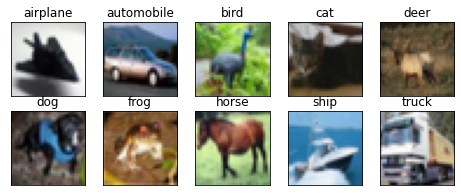

In [ ]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [ ]:
img, label = cifar10[80]
class_names[label]

'cat'

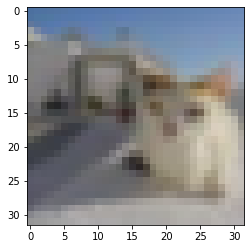

In [ ]:
plt.imshow(img)
plt.show()

## Transforms

In [ ]:
from torchvision import transforms

dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

## Converting the images to a tensor

In [ ]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t

tensor([[[0.2980, 0.3059, 0.3098,  ..., 0.4078, 0.4118, 0.4157],
         [0.3059, 0.3098, 0.3098,  ..., 0.4275, 0.4314, 0.4353],
         [0.3804, 0.3451, 0.3333,  ..., 0.4471, 0.4471, 0.4510],
         ...,
         [0.3961, 0.4549, 0.4745,  ..., 0.7294, 0.6980, 0.6902],
         [0.5255, 0.5686, 0.5882,  ..., 0.6902, 0.7020, 0.6863],
         [0.5882, 0.6000, 0.6039,  ..., 0.6980, 0.7020, 0.7020]],

        [[0.4392, 0.4471, 0.4471,  ..., 0.5294, 0.5333, 0.5373],
         [0.4471, 0.4627, 0.4667,  ..., 0.5412, 0.5451, 0.5490],
         [0.4667, 0.4627, 0.4667,  ..., 0.5569, 0.5569, 0.5608],
         ...,
         [0.3961, 0.4549, 0.4745,  ..., 0.7098, 0.6706, 0.6588],
         [0.5255, 0.5725, 0.5882,  ..., 0.6745, 0.6824, 0.6667],
         [0.5882, 0.6000, 0.6039,  ..., 0.6824, 0.6863, 0.6863]],

        [[0.6235, 0.6353, 0.6314,  ..., 0.7137, 0.7176, 0.7176],
         [0.6235, 0.6314, 0.6275,  ..., 0.7176, 0.7176, 0.7216],
         [0.6078, 0.6314, 0.6588,  ..., 0.7255, 0.7294, 0.

In [ ]:
img_t.shape

torch.Size([3, 32, 32])

## Directly getting the transformed dataset

In [ ]:
tensor_cifar10 = datasets.CIFAR10("./", train=True, download=False, 
                                  transform=transforms.ToTensor())

In [ ]:
img_t, _ = tensor_cifar10[80]
img_t

tensor([[[0.2980, 0.3059, 0.3098,  ..., 0.4078, 0.4118, 0.4157],
         [0.3059, 0.3098, 0.3098,  ..., 0.4275, 0.4314, 0.4353],
         [0.3804, 0.3451, 0.3333,  ..., 0.4471, 0.4471, 0.4510],
         ...,
         [0.3961, 0.4549, 0.4745,  ..., 0.7294, 0.6980, 0.6902],
         [0.5255, 0.5686, 0.5882,  ..., 0.6902, 0.7020, 0.6863],
         [0.5882, 0.6000, 0.6039,  ..., 0.6980, 0.7020, 0.7020]],

        [[0.4392, 0.4471, 0.4471,  ..., 0.5294, 0.5333, 0.5373],
         [0.4471, 0.4627, 0.4667,  ..., 0.5412, 0.5451, 0.5490],
         [0.4667, 0.4627, 0.4667,  ..., 0.5569, 0.5569, 0.5608],
         ...,
         [0.3961, 0.4549, 0.4745,  ..., 0.7098, 0.6706, 0.6588],
         [0.5255, 0.5725, 0.5882,  ..., 0.6745, 0.6824, 0.6667],
         [0.5882, 0.6000, 0.6039,  ..., 0.6824, 0.6863, 0.6863]],

        [[0.6235, 0.6353, 0.6314,  ..., 0.7137, 0.7176, 0.7176],
         [0.6235, 0.6314, 0.6275,  ..., 0.7176, 0.7176, 0.7216],
         [0.6078, 0.6314, 0.6588,  ..., 0.7255, 0.7294, 0.

In [ ]:
img_t.max(), img_t.min(), img_t.shape, type(img_t)

(tensor(0.8588), tensor(0.1333), torch.Size([3, 32, 32]), torch.Tensor)

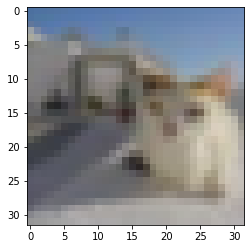

In [ ]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## Normalizing data

In [ ]:
import torch 

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10("./", train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(), 
                                           transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
                                       ]))

## Making a birds v/s planes classifier

In [ ]:
cifar10 = datasets.CIFAR10(
    "./", train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))


cifar10_val = datasets.CIFAR10(
    "./", train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label])
  for img, label in cifar10
  if label in [0, 2]]

cifar2_val = [(img, label_map[label])
  for img, label in cifar10_val
  if label in [0, 2]]

## Defining the model 

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(3072, 
              512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

## We will print out the probability of an object belonging to one class for which we use `Softmax`

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 
              512),
    nn.Tanh(),
    nn.Linear(512, 2), 
    nn.Softmax(dim=1)
)

## Let's try to run the model without even training it

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


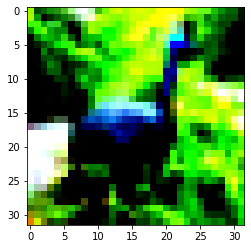

In [ ]:
img, _ = cifar2[0]
type(img)
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
img.shape

torch.Size([3, 32, 32])

In [ ]:
batch_img = img.view(-1).unsqueeze(0)
batch_img.shape

torch.Size([1, 3072])

In [ ]:
model(batch_img)

tensor([[0.4286, 0.5714]], grad_fn=<SoftmaxBackward>)

## The model needs to be penalized when incorrect predictions are made, so we use `LogSoftmax`

In [ ]:
model = nn.Sequential(
  nn.Linear(3072, 512),
  nn.Tanh(),
  nn.Linear(512, 2),
  nn.LogSoftmax(dim=1))

In [ ]:
loss = nn.NLLLoss()

In [ ]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.6074, grad_fn=<NllLossBackward>)

## Training the classifier

In [ ]:
torch.cuda.set_device(0)
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

In [ ]:
import torch 
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(3072, 512), 
    nn.Tanh(), 
    nn.Linear(512, 2), 
    nn.LogSoftmax(dim=1)
)

learning_rate  = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(0, n_epochs):
  for img, label in cifar2:
    pred = model(img.view(-1).unsqueeze(0))
    loss = loss_fn(pred, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 4.885203
Epoch: 1, Loss: 8.398516
Epoch: 2, Loss: 12.194094
Epoch: 3, Loss: 8.400795
Epoch: 4, Loss: 7.035946
Epoch: 5, Loss: 6.672678
Epoch: 6, Loss: 14.702289
Epoch: 7, Loss: 2.806485
Epoch: 8, Loss: 9.093428
Epoch: 9, Loss: 1.937908
Epoch: 10, Loss: 0.096189
Epoch: 11, Loss: 7.063046
Epoch: 12, Loss: 10.701083
Epoch: 13, Loss: 8.897695
Epoch: 14, Loss: 10.900598
Epoch: 15, Loss: 3.986428
Epoch: 16, Loss: 0.029039
Epoch: 17, Loss: 1.960492
Epoch: 18, Loss: 10.484950
Epoch: 19, Loss: 1.311135
Epoch: 20, Loss: 7.059778
Epoch: 21, Loss: 8.214798
Epoch: 22, Loss: 11.473054
Epoch: 23, Loss: 4.624972
Epoch: 24, Loss: 0.464035
Epoch: 25, Loss: 5.108599
Epoch: 26, Loss: 0.656461
Epoch: 27, Loss: 4.596004
Epoch: 28, Loss: 1.365604
Epoch: 29, Loss: 3.978047
Epoch: 30, Loss: 13.991315
Epoch: 31, Loss: 0.012959
Epoch: 32, Loss: 9.526802
Epoch: 33, Loss: 5.412449
Epoch: 34, Loss: 5.310781
Epoch: 35, Loss: 7.506864
Epoch: 36, Loss: 7.706320
Epoch: 37, Loss: 13.320793
Epoch: 38, Los

## Using dataloader to form batches of training data ourselves

In [ ]:
import torch 
import torch.nn as nn
from torch import optim

torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512), 
    nn.Tanh(), 
    nn.Linear(512, 2), 
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(0, n_epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    preds = model(imgs.view(batch_size, -1))
    loss = loss_fn(preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Streaming output truncated to the last 5000 lines.
Epoch: 68, Loss: 0.020706
Epoch: 68, Loss: 0.023238
Epoch: 68, Loss: 0.026829
Epoch: 68, Loss: 0.064414
Epoch: 68, Loss: 0.033158
Epoch: 68, Loss: 0.034060
Epoch: 68, Loss: 0.042462
Epoch: 68, Loss: 0.029777
Epoch: 68, Loss: 0.035627
Epoch: 68, Loss: 0.044759
Epoch: 68, Loss: 0.039389
Epoch: 68, Loss: 0.043158
Epoch: 68, Loss: 0.035331
Epoch: 68, Loss: 0.057891
Epoch: 68, Loss: 0.033963
Epoch: 68, Loss: 0.027889
Epoch: 68, Loss: 0.040650
Epoch: 68, Loss: 0.054751
Epoch: 68, Loss: 0.048984
Epoch: 68, Loss: 0.061292
Epoch: 68, Loss: 0.050086
Epoch: 68, Loss: 0.061158
Epoch: 68, Loss: 0.027495
Epoch: 68, Loss: 0.043672
Epoch: 68, Loss: 0.053512
Epoch: 68, Loss: 0.036537
Epoch: 68, Loss: 0.028120
Epoch: 68, Loss: 0.032815
Epoch: 68, Loss: 0.044790
Epoch: 68, Loss: 0.040989
Epoch: 68, Loss: 0.069342
Epoch: 68, Loss: 0.029691
Epoch: 68, Loss: 0.040325
Epoch: 68, Loss: 0.054844
Epoch: 68, Loss: 0.070573
Epoch: 68, Loss: 0.037940
Epoch: 68, Lo

## Performing validation

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print("Accuracy:", correct / total)

Accuracy: 0.815
